In [17]:
# Célula 1: Instalação das dependências e importação de libs
!pip install tabulate
!pip install matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Célula 2: Definição dos Dados Chave (Hardcoded do PPTX)

# A. Indicadores de Valuation
dados_valuation = {
    'Preço Alvo VALE ON': 'R$ 74,37',
    'EV/EBITDA Atual (Negociado)': '3,46x',
    'EBITDA (Estimado)': 'R$ 1.937.000.000,00',
    'Produção Anual de Ferro (toneladas)': '315.000.000,00',
    'Cotação do Minério de Ferro por Tonelada': 'R$ 425,00',
    'Target Price Longo Prazo (Minério)': 'U$ 85,00 @ R$ 5,00',
}

# B. Tabela de Projeções de Fluxo de Caixa (Valores em R$ Milhares)
dados_caixa = {
    'Período': ['2022 (9M)', '2023 (9M)', '2024 (9M)', '2025 (9M)', '2026 (9M)'],
    'Lucro Líquido': [86424000, -2199000, -2566000, -1416000, -1516000],
    'Geração de Caixa Operacional (GCO)': [85112400, 50346600, 104153350, 18205850, 17995850],
    'Investimentos em Capital Fixo (Capex)': [-36646000, -41556000, -15412000, -18812000, -16792000],
    'Posição do Caixa Final': [-5637600, -2916400, 148183350, -11256150, -646150]
}
df_caixa = pd.DataFrame(dados_caixa)

In [19]:
# Célula de Código Corrigida (Apenas se quiser manter como código)

# # Análise de Valuation e Macro: VALE S.A.
# ### Relatório Executivo - Alfa Value
# Analista: Gustavo Idalino Venceslau Cavalheiro  <--- LINHA QUE DEU ERRO AGORA ESTÁ COMENTADA
# Contato: +5511962320573
# Email: gustavovences01@gmail.com

# **Tese Principal:** A VALE apresenta indicadores de *valuation* que refletem um fluxo de caixa em recuperação. A diversificação...

# Agora, o código Python válido deve seguir abaixo:

!pip install tabulate
import pandas as pd
# ... (restante do seu código)

In [20]:
# Célula 3: Exibição de KPIs e Tabela de Projeções

print("## Indicadores-Chave de Valuation")
print("-" * 40)
for chave, valor in dados_valuation.items():
    print(f"* **{chave}**: {valor}")
print("-" * 40)

print("\n## Tabela de Projeção de Fluxo de Caixa (Valores em R$ Milhares)")
# Mostra apenas as colunas essenciais para uma análise rápida de caixa
df_exibicao = df_caixa[['Período', 'Geração de Caixa Operacional (GCO)', 'Investimentos em Capital Fixo (Capex)', 'Posição do Caixa Final']]
print(df_exibicao.to_markdown(index=False, floatfmt=",.0f"))

## Indicadores-Chave de Valuation
----------------------------------------
* **Preço Alvo VALE ON**: R$ 74,37
* **EV/EBITDA Atual (Negociado)**: 3,46x
* **EBITDA (Estimado)**: R$ 1.937.000.000,00
* **Produção Anual de Ferro (toneladas)**: 315.000.000,00
* **Cotação do Minério de Ferro por Tonelada**: R$ 425,00
* **Target Price Longo Prazo (Minério)**: U$ 85,00 @ R$ 5,00
----------------------------------------

## Tabela de Projeção de Fluxo de Caixa (Valores em R$ Milhares)
| Período   |   Geração de Caixa Operacional (GCO) |   Investimentos em Capital Fixo (Capex) |   Posição do Caixa Final |
|:----------|-------------------------------------:|----------------------------------------:|-------------------------:|
| 2022 (9M) |                             85112400 |                               -36646000 |                 -5637600 |
| 2023 (9M) |                             50346600 |                               -41556000 |                 -2916400 |
| 2024 (9M) |                   

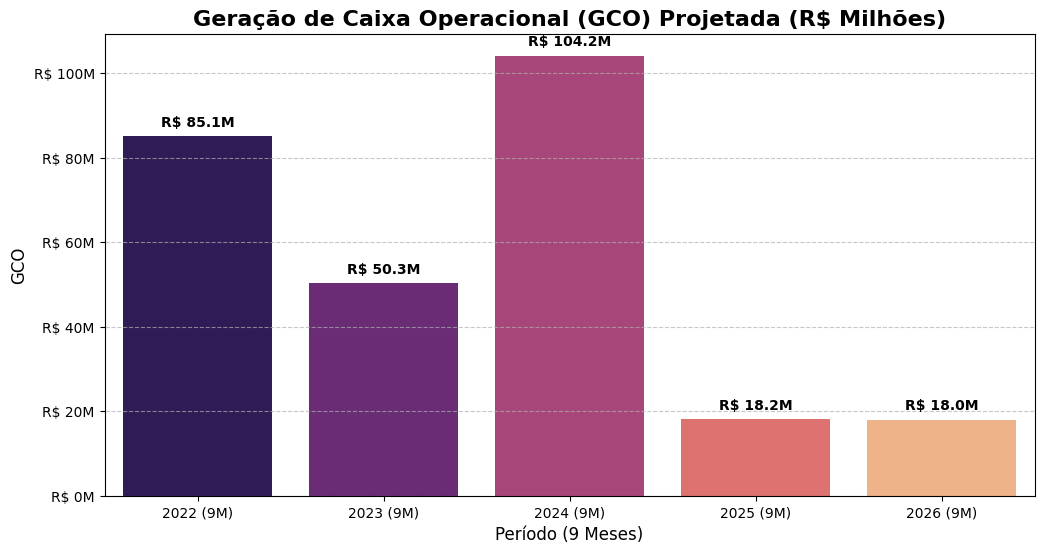

In [25]:
# Célula 4: Geração do Gráfico de Análise de Caixa

def gerar_grafico_caixa(dataframe):
    """Gera o gráfico de barras da Geração de Caixa Operacional."""
    coluna_caixa = 'Geração de Caixa Operacional (GCO)'

    plt.figure(figsize=(12, 6))

    ax = sns.barplot(
        x='Período',
        y=coluna_caixa,
        data=dataframe,
        palette='magma', # Paleta profissional
        hue='Período', # Address FutureWarning: Passing `palette` without assigning `hue`
        legend=False # Set legend to False as suggested by the warning
    )

    plt.title('Geração de Caixa Operacional (GCO) Projetada (R$ Milhões)', fontsize=16, fontweight='bold')
    plt.xlabel('Período (9 Meses)', fontsize=12)
    plt.ylabel('GCO', fontsize=12)

    # Conversão e Formatação para R$ Milhões no Eixo Y
    # Address UserWarning: set_ticklabels() should only be used with a fixed number of ticks
    y_ticks = ax.get_yticks()
    ax.yaxis.set_major_locator(plt.FixedLocator(y_ticks)) # Set a fixed locator
    ax.set_yticklabels([f'R$ {y/1000000:.0f}M' for y in y_ticks])


    # Adicionar os valores exatos (em R$ Milhões) nas barras
    for p in ax.patches:
        ax.annotate(f'R$ {p.get_height()/1000000:.1f}M',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=10,
                    fontweight='bold')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

gerar_grafico_caixa(df_caixa)

In [29]:
# Célula de Código: Análise e Conclusões

print("\n## 4. Análise e Conclusões")
print("---")
print("### Destaques Macroeconômicos")
[cite_start]print("* O setor de mineração representa ~4% do PIB, com faturamento de ~R$340 bilhões, e ~30% das exportações nacionais (U$80B)[cite: 118].")
[cite_start]print("* Riscos & Oportunidades: Há riscos de recessão nos EUA e na China[cite: 122], além do impacto do 'imposto do pecado' na extração. [cite_start]A VALE se beneficia de sua alta exposição cambial com a valorização do Dólar em suas receitas[cite: 108].")
[cite_start]print("* Sustentabilidade: Adoção da Economia Verde, com VALE investindo em tecnologias para neutralizar emissões de carbono e créditos de Carbono[cite: 120].")

print("\n### Análise Fundamentalista (VALE S.A.)")
[cite_start]print("* Caixa e Liquidez: A Geração de Caixa Operacional (GCO) mostra recuperação, e há expectativas de melhoria no fluxo de caixa apesar do Capital de Giro negativo[cite: 107, 129].")
[cite_start]print("* Estratégia e Crescimento: A empresa busca diminuir exposição à China, focando em acordos com o Oriente Médio, Ásia e Europa para aumentar receita e entrar em acordos ambientais[cite: 111, 112].")
[cite_start]print("* Transição Energética: O EBITDA vem se recuperando devido a investimentos em novas máquinas, infraestrutura e adoção de biocombustíveis e máquinas sustentáveis[cite: 109, 110].")

print("\n## Recomendação")
[cite_start]print("O preço alvo de R$ 74,37 é suportado pela resiliência do minério de ferro e pela estratégia de diversificação de clientes[cite: 17, 31, 127, 128]. A recuperação do fluxo de caixa e o foco em mercados desenvolvidos justificam uma visão positiva de longo prazo.")
print("---")

SyntaxError: invalid syntax (ipython-input-3375397463.py, line 6)

## Análise e Conclusões

### 1. Destaques Macroeconômicos
* [cite_start]O setor de mineração representa ~4% do PIB e ~30% das exportações nacionais (U$80B)[cite: 118].
* [cite_start]**Riscos & Oportunidades:** Há riscos de recessão nos EUA e na China [cite: 122][cite_start], além do impacto do "imposto do pecado" na extração[cite: 119]. [cite_start]Contudo, a VALE se beneficia de sua alta exposição cambial com a valorização do Dólar em suas receitas[cite: 108].

### 2. Análise Fundamentalista (VALE S.A.)
* **Caixa e Liquidez:** A Geração de Caixa Operacional (GCO) mostra uma recuperação notável, saltando de R$ 50B em 2023 para R$ 104B em 2024 (projeção 9M). [cite_start]O GCO se mostra resiliente apesar do Capital de Giro negativo[cite: 107].
* [cite_start]**Despesas:** As maiores despesas ainda estão relacionadas aos processos de Brumadinho[cite: 107].
* [cite_start]**Estratégia e Crescimento:** A empresa está em um movimento estratégico de diminuição da exposição à China, fechando acordos com o Oriente Médio, Ásia e Europa[cite: 111]. [cite_start]Este movimento visa acordos ambientais e aumento de receita[cite: 112].

### 3. Fatores ESG e Transição Energética
* [cite_start]A VALE está investindo em tecnologias para neutralizar emissões de carbono [cite: 120] [cite_start]e adota biocombustíveis e máquinas sustentáveis[cite: 110]. [cite_start]Esta transição contribui para a recuperação do EBITDA [cite: 109][cite_start], alinhando a empresa com a **Economia Verde**[cite: 124].

## Recomendação
O preço alvo de **R$ 74,37** é suportado pela resiliência do minério de ferro e pela estratégia de diversificação de clientes. A recuperação do fluxo de caixa e o foco em mercados desenvolvidos justificam uma visão **positiva** de longo prazo.